# Importing data 

In [42]:
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [43]:
data=pd.read_csv("/content/Credit_score.csv")

In [44]:
data.head(10)

,revenue,Nb_cred,Cred_in_prog,Chiffre_daf,secteur,Mouv_geo,Internet,Inves_extern,site_web,Covid_impact,sponsor,Nb_Abb,Siege,Credit_score,Taux_sat
0,320520,6,2,360267,Embalmer,Pr,0,0,0,0,0,676048,Marrakech,0,100
1,759324,10,9,930156,Fishing,Int,0,0,0,0,0,692453,None,10,0
2,544609,4,4,319685,Marketing,Pr,0,0,0,0,0,756566,Laayoune,0,100
3,266205,9,9,377956,Landscape,Nat,0,0,0,0,0,649304,Casa,10,100
4,174362,10,8,247323,Employment Office,Rg,0,0,0,0,0,176844,None,0,50
5,528009,4,2,271857,Remodeling,Rg,0,0,0,0,0,946996,Laayoune,0,0
6,600160,5,3,462576,Equipment Rental,Int,0,0,0,0,0,509609,Internet,0,50
7,718001,4,4,528621,Emergency Medical Services,Int,0,0,0,0,0,207004,Marrakech,10,0
8,338124,5,4,755515,Telemarketing,Int,0,0,0,0,0,57366,Rabat,0,100
9,827516,8,7,39945,Notary Public,Rg,0,0,0,0,0,238012,Rabat,0,50


In [45]:
#object columns
data.dtypes

revenue          int64
Nb_cred          int64
Cred_in_prog     int64
Chiffre_daf      int64
secteur         object
Mouv_geo        object
Internet         int64
Inves_extern     int64
site_web         int64
Covid_impact     int64
sponsor          int64
Nb_Abb           int64
Siege           object
Credit_score     int64
Taux_sat         int64
dtype: object

In [46]:
data[data.isnull().any(axis=1)]

,revenue,Nb_cred,Cred_in_prog,Chiffre_daf,secteur,Mouv_geo,Internet,Inves_extern,site_web,Covid_impact,sponsor,Nb_Abb,Siege,Credit_score,Taux_sat


In [47]:
#object to categorical 
data["secteur"] = data["secteur"].astype('category')
data["Mouv_geo"] = data["Mouv_geo"].astype('category')
data["Siege"] = data["Siege"].astype('category')

In [48]:
#encoding categorical columns
data["secteur"] = data["secteur"].cat.codes
data["Mouv_geo"] = data["Mouv_geo"].cat.codes
data["Siege"] = data["Siege"].cat.codes

data.head()

,revenue,Nb_cred,Cred_in_prog,Chiffre_daf,secteur,Mouv_geo,Internet,Inves_extern,site_web,Covid_impact,sponsor,Nb_Abb,Siege,Credit_score,Taux_sat
0,320520,6,2,360267,10,2,0,0,0,0,0,676048,3,0,100
1,759324,10,9,930156,17,0,0,0,0,0,0,692453,4,10,0
2,544609,4,4,319685,24,2,0,0,0,0,0,756566,2,0,100
3,266205,9,9,377956,22,1,0,0,0,0,0,649304,0,10,100
4,174362,10,8,247323,12,3,0,0,0,0,0,176844,4,0,50


In [49]:
x=data.drop("Credit_score",1)
y=data.Credit_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [50]:
x.head(10)

,revenue,Nb_cred,Cred_in_prog,Chiffre_daf,secteur,Mouv_geo,Internet,Inves_extern,site_web,Covid_impact,sponsor,Nb_Abb,Siege,Taux_sat
0,320520,6,2,360267,10,2,0,0,0,0,0,676048,3,100
1,759324,10,9,930156,17,0,0,0,0,0,0,692453,4,0
2,544609,4,4,319685,24,2,0,0,0,0,0,756566,2,100
3,266205,9,9,377956,22,1,0,0,0,0,0,649304,0,100
4,174362,10,8,247323,12,3,0,0,0,0,0,176844,4,50
5,528009,4,2,271857,31,3,0,0,0,0,0,946996,2,0
6,600160,5,3,462576,15,0,0,0,0,0,0,509609,1,50
7,718001,4,4,528621,11,0,0,0,0,0,0,207004,3,0
8,338124,5,4,755515,36,0,0,0,0,0,0,57366,5,100
9,827516,8,7,39945,25,3,0,0,0,0,0,238012,5,50


# CV

In [51]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

# GridSearchCv

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
std_slc=StandardScaler()
pca=decomposition.PCA()
logistic_Reg=linear_model.LogisticRegression()

In [54]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

In [55]:
n_components = list(range(1,x_train.shape[1]+1,1))

In [56]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [57]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [58]:
grid=GridSearchCV(pipe,parameters)
grid.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3500 fits failed out of a total of 7000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [59]:
print('Best Penalty:', grid.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', grid.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', grid.best_estimator_.get_params()['pca__n_components'])
print(); print(grid.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.004291934260128779
Best Number Of Components: 6

LogisticRegression(C=0.004291934260128779)


In [60]:
#print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
#print("accuracy :",model_cv.best_score_)

# Modeling

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [62]:
"""
model=LogisticRegression(C=0.0062505519252739694, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)"""

"\nmodel=LogisticRegression(C=0.0062505519252739694, class_weight=None, dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=100,\n          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,\n          solver='warn', tol=0.0001, verbose=0, warm_start=False)"

In [63]:
model_cv=LogisticRegression(C=0.0001 , fit_intercept=True, intercept_scaling=1, max_iter=100,)


In [64]:
model_cv.fit(x_train,y_train)

LogisticRegression(C=0.0001)

In [65]:
#for all data 
model_cv.fit(x,y)

LogisticRegression(C=0.0001)

In [66]:
y_pred=model_cv.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix

cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 2, 17],
       [ 4, 27]])

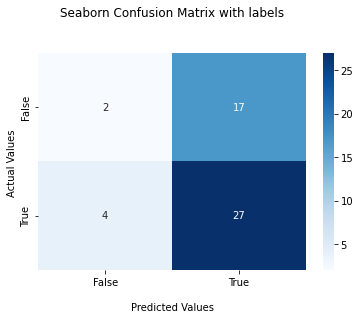

In [68]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [69]:
score=accuracy_score(y_test,y_pred)
score

0.58

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.58
